In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import os
import statsmodels.api as sm

In [37]:
os.chdir = (R'C:\Users\Pratik G Ratnaparkhi\Desktop\IVY Python\Python_7')
path_data = os.getcwd()
weather = pd.read_csv('weatherHistory.csv')

In [38]:
display(weather.head(3))

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [39]:
#Changing Col Names

In [40]:
weather = pd.DataFrame(weather)
weather = weather.rename(columns = {"Precip Type":"PrecipType","Temperature (C)":"Temperature",
                        "Apparent Temperature (C)":"AppTemp",
                       "Wind Speed (km/h)":"WindSpeed",
                       "Wind Bearing (degrees)":"WindBearing",
                       "Visibility (km)":"Visibility",
                       "Pressure (millibars)":"Pressure"})
weather.head()

,Formatted Date,Summary,PrecipType,Temperature,AppTemp,Humidity,WindSpeed,WindBearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [41]:
weather.isnull().sum()

Formatted Date      0
Summary             0
PrecipType        517
Temperature         0
AppTemp             0
Humidity            0
WindSpeed           0
WindBearing         0
Visibility          0
Loud Cover          0
Pressure            0
Daily Summary       0
dtype: int64

In [42]:
weather.PrecipType.unique()

array(['rain', 'snow', nan], dtype=object)

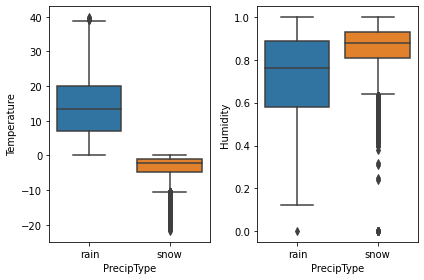

In [43]:
plt.subplot(1,2,1)
sns.boxplot(data=weather,y='Temperature',x='PrecipType')
plt.subplot(1,2,2)
sns.boxplot(data=weather,y='Humidity',x='PrecipType')
plt.tight_layout()

In [44]:
weather['PrecipType'].fillna("snow",inplace=True)

<AxesSubplot:>

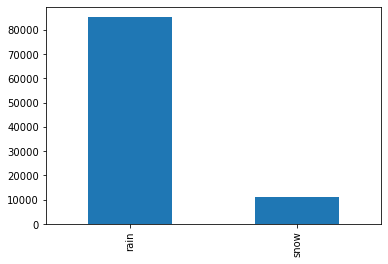

In [45]:
weather['PrecipType'].value_counts().plot(kind='bar')

In [46]:
#Lets check null values again
weather.isnull().sum()

Formatted Date    0
Summary           0
PrecipType        0
Temperature       0
AppTemp           0
Humidity          0
WindSpeed         0
WindBearing       0
Visibility        0
Loud Cover        0
Pressure          0
Daily Summary     0
dtype: int64

In [47]:
weather.describe(include='all')

,Formatted Date,Summary,PrecipType,Temperature,AppTemp,Humidity,WindSpeed,WindBearing,Visibility,Loud Cover,Pressure,Daily Summary
count,96453,96453,96453,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 16:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [48]:
a = weather["Temperature"]
b = weather["Humidity"]

<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>

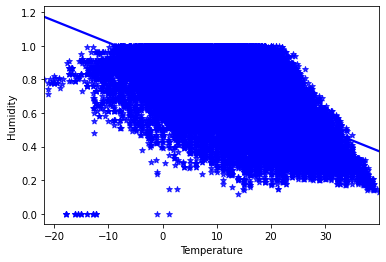

In [49]:
sns.regplot(x=a,y=b,color="blue",marker='*')

In [50]:
display(weather.head())

,Formatted Date,Summary,PrecipType,Temperature,AppTemp,Humidity,WindSpeed,WindBearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<AxesSubplot:xlabel='AppTemp'>

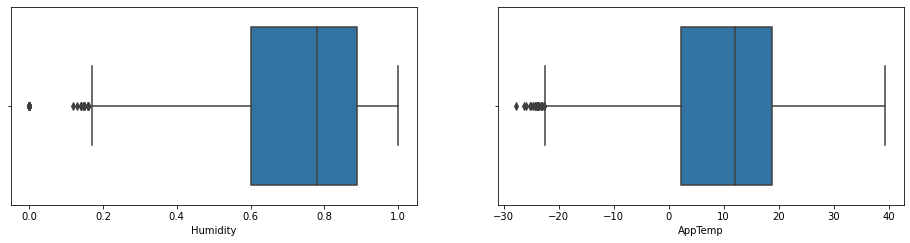

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x=weather['Humidity'])

plt.subplot(2,2,2)
sns.boxplot(x=weather['AppTemp'])

In [52]:
#removing outliers from humidity by IQR method
Q1 = weather.Humidity.quantile(0.25)
Q3 = weather.Humidity.quantile(0.75)
IQR = Q3-Q1
print("{},{},{}".format(Q1,Q3,IQR))

0.6,0.89,0.29000000000000004


In [53]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)
print(lower)

1.3250000000000002
0.16499999999999992


In [54]:
weather_1 = weather[(weather.Humidity>lower)&(weather.Humidity<upper)]
weather_1.head()


,Formatted Date,Summary,PrecipType,Temperature,AppTemp,Humidity,WindSpeed,WindBearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<AxesSubplot:xlabel='Humidity'>

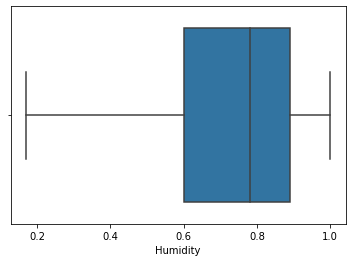

In [55]:
#Lets check outliers in humidity again
sns.boxplot(x=weather_1['Humidity'])

In [56]:
#Building MLR moddel

In [57]:
#creating dependent and independent variable
y= weather.iloc[:,[3]]
y

,Temperature
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [58]:
x= weather.iloc[:,[2,4,5]]
x

,PrecipType,AppTemp,Humidity
0,rain,7.388889,0.89
1,rain,7.227778,0.86
2,rain,9.377778,0.89
3,rain,5.944444,0.83
4,rain,6.977778,0.83
...,...,...,...
96448,rain,26.016667,0.43
96449,rain,24.583333,0.48
96450,rain,22.038889,0.56
96451,rain,21.522222,0.60


In [62]:
#creating dummies for col "Precip Type" as it is having categorical variable
x2 = pd.get_dummies(x, columns=['PrecipType'])
x2

,AppTemp,Humidity,PrecipType_rain,PrecipType_snow
0,7.388889,0.89,1,0
1,7.227778,0.86,1,0
2,9.377778,0.89,1,0
3,5.944444,0.83,1,0
4,6.977778,0.83,1,0
...,...,...,...,...
96448,26.016667,0.43,1,0
96449,24.583333,0.48,1,0
96450,22.038889,0.56,1,0
96451,21.522222,0.60,1,0


In [63]:
#checking Multicollinearity
x2 = sm.add_constant(x2)

In [64]:
model = sm.OLS(y,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.485e+06
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:38:42   Log-Likelihood:            -1.4423e+05
No. Observations:               96453   AIC:                         2.885e+05
Df Residuals:                   96449   BIC:                         2.885e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0396      0.013    231.752      0.000       3.014       3.065
AppTemp             0.8507      0.000   1760.930      0.000       0.850       0.852
Humidity           -2.7129      0.023   -120.186      0.000      -2.757      -2.669
PrecipType_rain     1.6923      0.009    179.902      0.000       1.674       1.711
PrecipType_snow     1.3473      0.009    146.354      0.000       1.329       1.365
==============================================================================
Omnibus:                     1859.690   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3562.051
Skew:                          -0.119   Prob(JB):                         0.00
Kurtosis:                       3.911   Cond. No.                     2.55e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#data is have R2 = 0.98 which is good 
#Also no signs of Multicollinearity in data as values of std error are less

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [69]:
print(regressor.coef_)
print(regressor.intercept_)

[[ 0.          0.85073171 -2.71153237  0.1641913  -0.1641913 ]]
[4.56615655]


In [79]:
y_pred = regressor.predict(x_test)
y_pred

array([[14.4780645 ],
       [13.11916109],
       [23.4607901 ],
       ...,
       [ 1.05662376],
       [ 8.44259566],
       [16.44174104]])

In [80]:
display(regressor.score(x_train,y_train))
display(regressor.score(x_test,y_test))

0.9872536581327575

0.9871334291625493

In [82]:
from sklearn.metrics import mean_absolute_error
mape=mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" , mape)

Mean Absolute Error is : 0.8247474104762


In [72]:
#Conclusion
"""We have achieved regressor score  around 98% for both train and test 
   data """
"""From MAE we can say that our predicted values are
   less than or greater than 0.82 units